# 1- Instalacion de librerias

In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 19.5 MB/s eta 0:00:00


In [2]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=4da2d0d1895b9aedf331266f302efa0fe185d2fbd067d16703006416141ad860
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

# 2- Imports previos

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Pip install method (recommended)
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

# 3- Descarga de dataset creado en roboflow

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="IgWHCgX44Xcje4j7Lbd7")
project = rf.workspace("ia-t3").project("vehiculos-de-tierra-firme")
dataset = project.version(3).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.116, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Vehiculos-de-tierra-firme-3 in yolov8:: 100%|██████████| 9494/9494 [00:04<00:00, 2219.16it/s]


# 4- Entrenamiento

In [15]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
100% 21.5M/21.5M [00:00<00:00, 206MB/s]
Ultralytics YOLOv8.0.116  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Vehiculos-de-tierra-firme-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visua

# 5- Analisis

In [16]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1686543219.729870c7af47.6886.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


/content


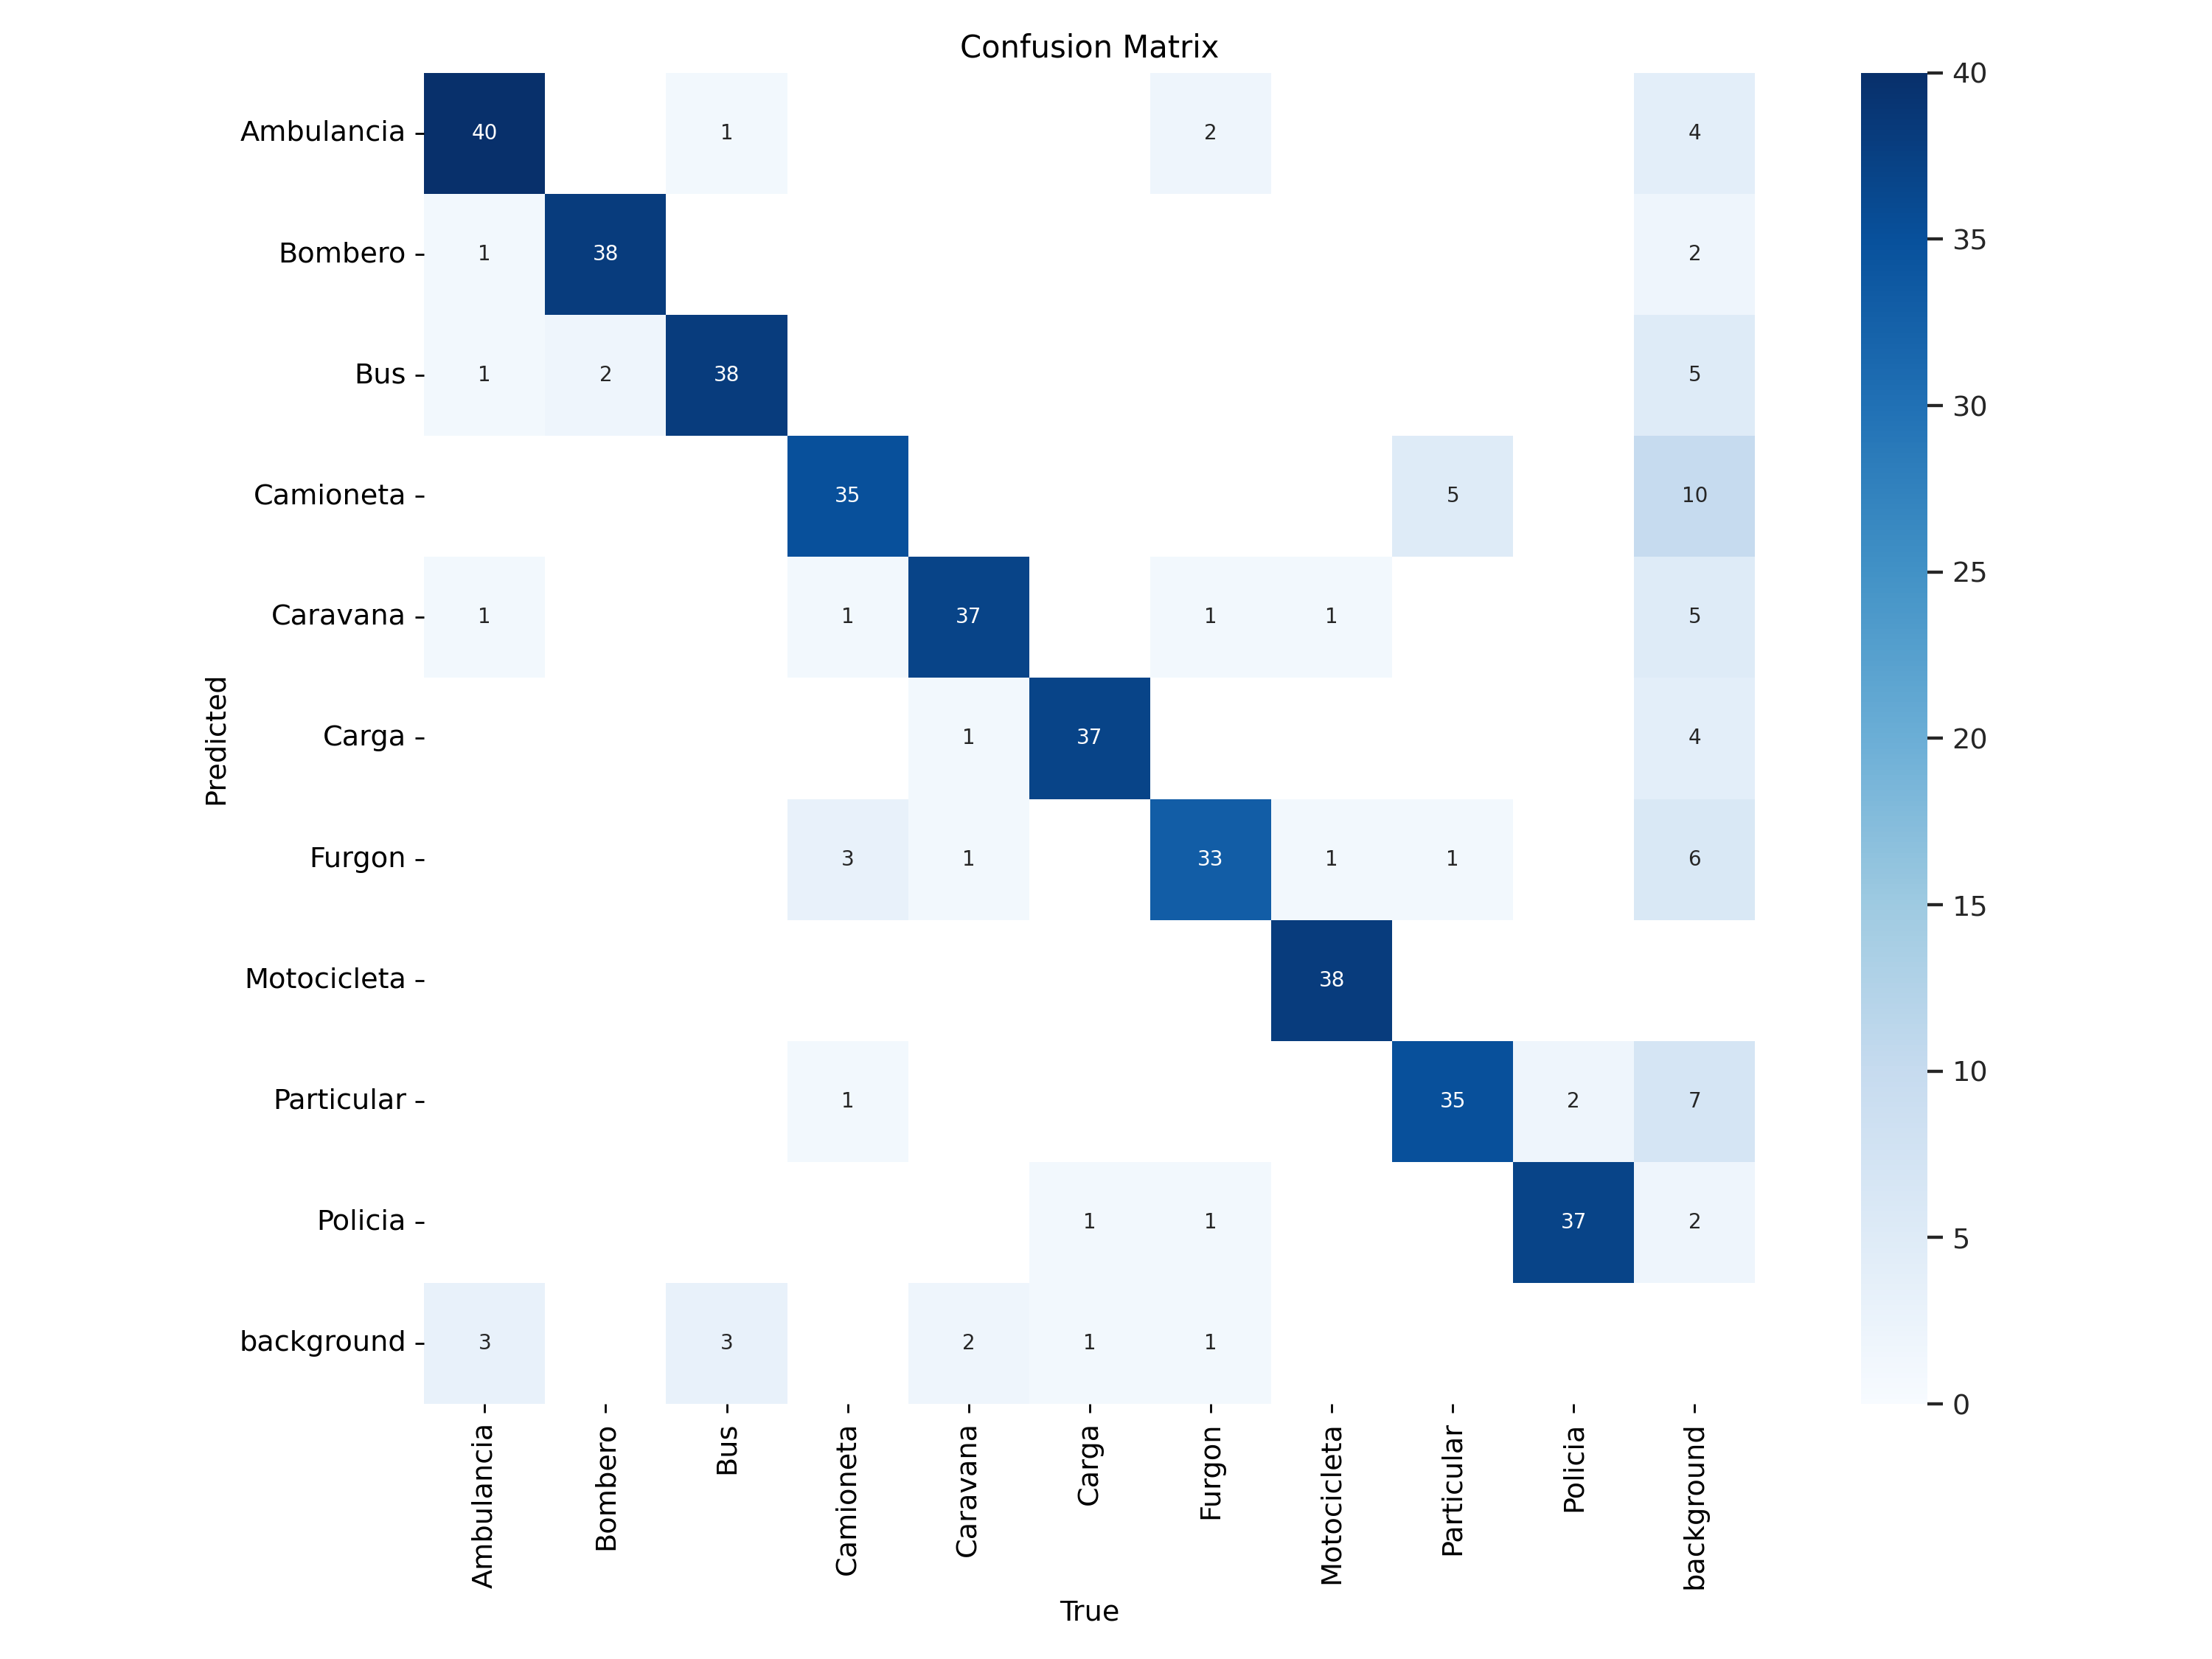

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


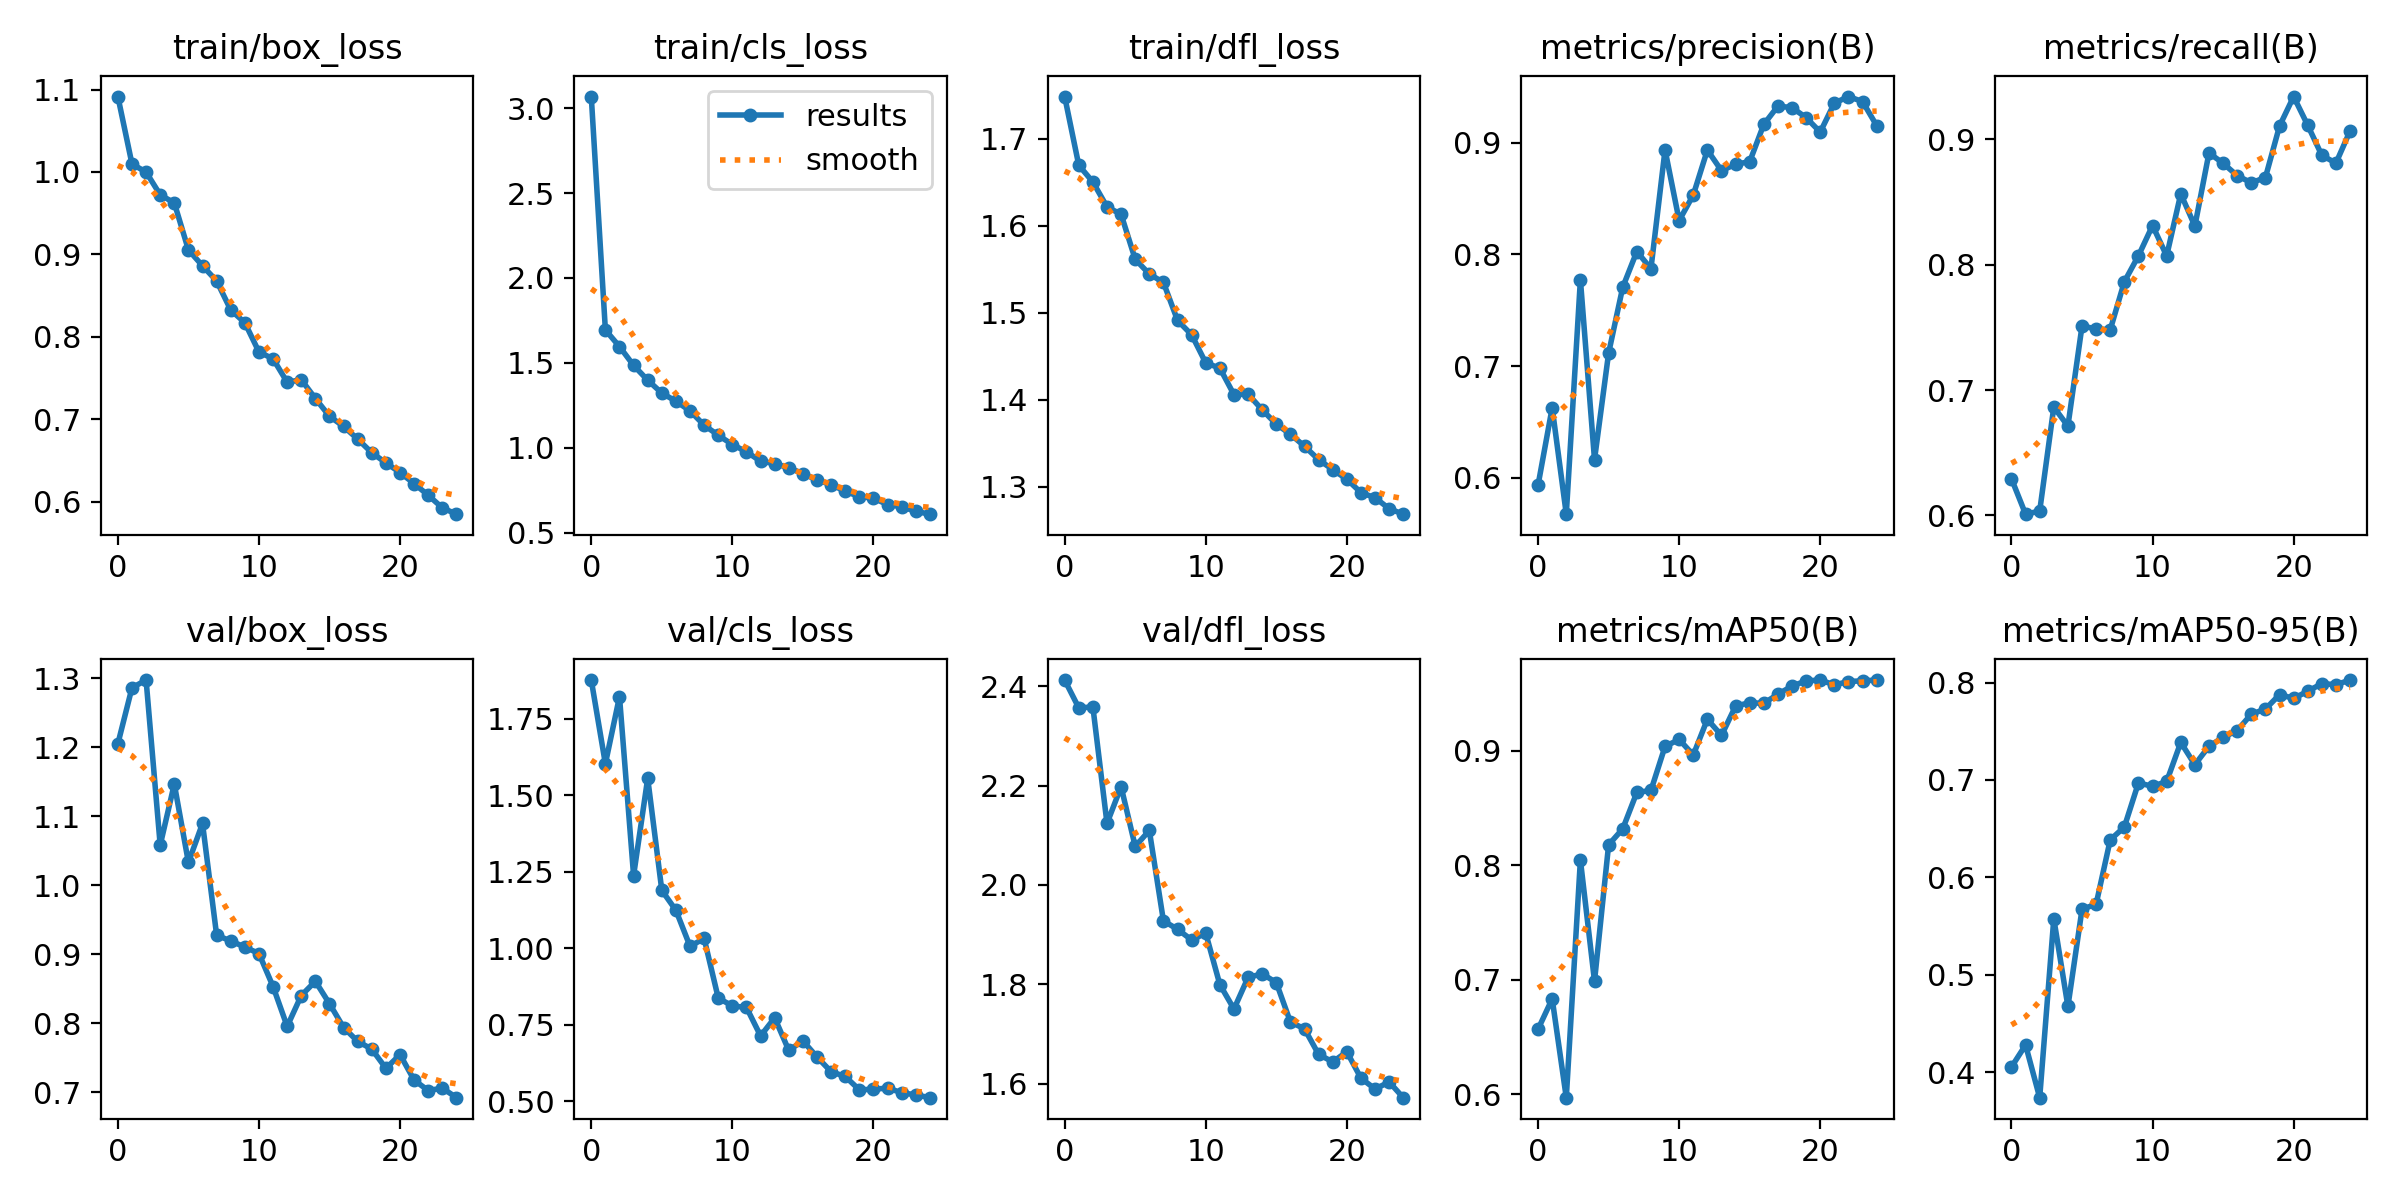

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

# 6- Carga de pesos de entrenamiento

In [6]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.116 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 25.3MB/s]
val: Scanning /content/datasets/Vehiculos-de-tierra-firme-3/valid/labels... 391 images, 0 backgrounds, 0 corrupt: 100% 391/391 [00:00<00:00, 2006.99it/s]
val: New cache created: /content/datasets/Vehiculos-de-tierra-firme-3/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:11<00:00,  2.09it/s]
                   all        391        406      0.915      0.907      0.962      0.803
            Ambulancia        391         46      0.931       0.88      0.945      0.815
               Bombero        391         40       0.95      0.955       0.99      0.797
                   Bus        391         42      0.908      0.905      0.957      0.746
             Camioneta        391         40      0.805        0.9     

# 7- Prueba de prediccion

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
WARNING  user config directory is not writeable, defaulting to '/tmp/Ultralytics'.
Ultralytics YOLOv8.0.116  Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients

image 1/207 /content/datasets/Vehiculos-de-tierra-firme-3/test/images/Bus105_jpg.rf.0ac93c771910f618ef950dfda54fff99.jpg: 800x800 2 Buss, 24.7ms
image 2/207 /content/datasets/Vehiculos-de-tierra-firme-3/test/images/Bus106_jpg.rf.44f4fc8d8ef7118b427d22fe47daba55.jpg: 800x800 1 Bus, 24.7ms
image 3/207 /content/datasets/Vehiculos-de-tierra-firme-3/test/images/Bus116_jpg.rf.b97d6279fc41cdce0bf41a71e67bb697.jpg: 800x800 1 Bus, 24.7ms
image 4/207 /content/datasets/Vehiculos-de-tierra-firme-3/test/images/Bus136_jpg.rf.5769f7458fef0ffb25b08eadfb6a105b.jpg: 800x800 2 Buss, 24.7ms
image 5/207 /content/datasets/Vehiculos-de-tierra-firme-3/test/images/Bus145_jpg.rf.f36be97d6f70a26b61316eadc45acfb1.jpg: 800x800 1 Bus, 24.6ms
image 6/207 /content/datasets/

# Descargar entorno

In [20]:
!zip -r /content/file.zip /content/runs

from google.colab import files
files.download("/content/file.zip")


  adding: content/runs/ (stored 0%)
  adding: content/runs/.ipynb_checkpoints/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 11%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 8%)
  adding: content/runs/detect/val/F1_curve.png (deflated 7%)
  adding: content/runs/detect/val/PR_curve.png (deflated 13%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 10%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 8%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 7%)
  adding: content/runs/detect/val/R_curve.png (deflated 8%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 19%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 24%)
  adding: content/runs/detect/val/P_curve.png (deflated 9%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 7%)
  adding:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>